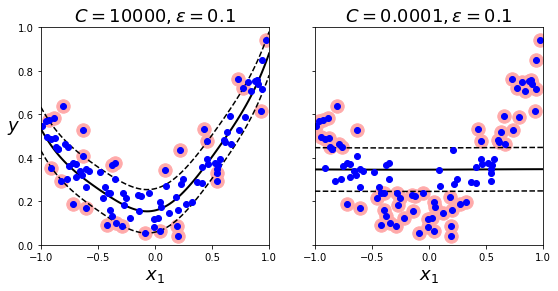

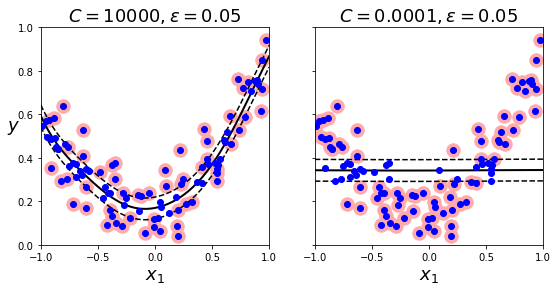

In [3]:



# SVM for regression in 1d
# Code is based on 
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb



# import superimport

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVR
from sklearn.svm import SVR

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    #plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
#y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
y = (0.2 + 0.1 * X + 0.5 * X**2 + 0.1 *  X**3 + np.random.randn(m, 1)/10).ravel()

epsilons = [0.1, 0.05]
eps_names = ['0p1', '0p05']
for i, eps in enumerate(epsilons):
    #svm_poly_reg1 = SVR(kernel="poly", degree=5, C=1e3, epsilon=eps, gamma="scale")
    #svm_poly_reg2 = SVR(kernel="poly", degree=5, C=1e-3, epsilon=eps, gamma="scale")
    svm_reg1 = SVR(kernel="rbf", gamma=1, C=10000, epsilon=eps)
    svm_reg2 = SVR(kernel="rbf", gamma=1, C=0.0001, epsilon=eps)
    
    svm_reg1.fit(X, y)
    svm_reg2.fit(X, y)

    fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
    plt.sca(axes[0])
    plot_svm_regression(svm_reg1, X, y, [-1, 1, 0, 1])
    plt.title(r"$C={}, \epsilon = {}$".format(svm_reg1.C, svm_reg1.epsilon), fontsize=18)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.sca(axes[1])
    plot_svm_regression(svm_reg2, X, y, [-1, 1, 0, 1])
    plt.title(r"$C={}, \epsilon = {}$".format(svm_reg2.C, svm_reg2.epsilon), fontsize=18)
#     fname = '../figures/svm_regression_e{}.pdf'.format(eps_names[i])
#     plt.savefig(fname, dpi=300)
    plt.show()

